In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
from collections import namedtuple

In [2]:
n_agents = 3
rewards = []
actions = []
states = []

with open('data.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        row = [float(r) for r in row]
        rewards.append(row[:n_agents])
        actions.append(row[n_agents: 2*n_agents])
        states.append(row[2*n_agents:])

rewards = np.array(rewards)
actions = np.array(actions)
states = np.array(states)       

State for each agent:
* Distance to RX (node ID = 0)
* Distance to RX (node ID = 2)
* Distance to RX (node ID = 4)
* SINR
* Interference-caused
* n_success
* TX Power
* Interference-sensed
* Buffer

In [3]:
# state = namedtuple('state', ["sinr", "interference_caused", "n_success", "tx_powers",
#                              "interference_sensed", "buffer"])
sinr = []
interference = []
n_success = []
tx_powers = []
interference_sensed = []
buffer = []
n_features = len(states[1]) // n_agents

for s in states:
    step_sinr = []
    step_interference = []
    step_n_success = []
    step_tx_powers = []
    step_interference_sensed = []
    step_buffer = []
    for i in range(n_agents):
        step_sinr.append(s[n_features*i + n_agents])
        step_interference.append(s[n_features*i + n_agents + 1])
        step_n_success.append(s[n_features*i + n_agents + 2])
        step_tx_powers.append(s[n_features*i + n_agents + 3])
        step_interference_sensed.append(s[n_features*i + n_agents + 4])
        step_buffer.append(s[n_features*i + n_agents + 5])

    sinr.append(step_sinr)
    interference.append(step_interference)
    n_success.append(step_n_success)
    tx_powers.append(step_tx_powers)
    interference_sensed.append(step_interference_sensed)
    buffer.append(step_buffer)

sinr = np.array(sinr)
interference = np.array(interference)
n_success = np.array(n_success)
tx_powers = np.array(tx_powers)
interference_sensed = np.array(interference_sensed)
buffer = np.array(buffer)

In [4]:
history = 100

avgs = [[] for _ in range(n_agents)] # rewards
avg_sinr = np.zeros((states.shape[0], n_agents))
avg_interference = np.zeros((states.shape[0], n_agents))
avg_buffer = np.zeros((states.shape[0], n_agents))

for i in range(history, len(rewards)):
    for j in range(n_agents):
        avgs[j].append(np.mean(rewards[:, j][i - history: i]))
        # Wait, what are these doing? Oh, it's the same.
        avg_sinr[i][j] = np.mean(sinr[:, j][i - history: i])
        avg_interference[i][j] = np.mean(interference[:, j][i - history: i])
        avg_buffer[i][j] = np.mean(buffer[:, j][i - history: i])


reward_sum = [sum(rewards[i]) for i in range(len(rewards))]
avg_reward_sum = []
for i in range(history, len(rewards)):
    avg_reward_sum.append(np.mean(reward_sum[i - history: i]))

### Reward

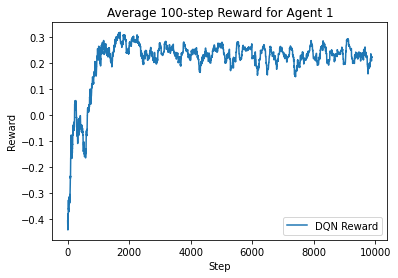

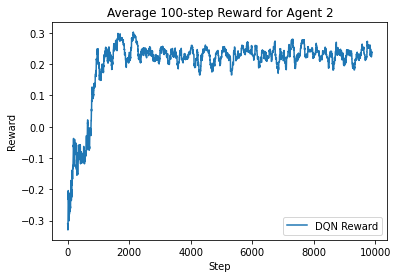

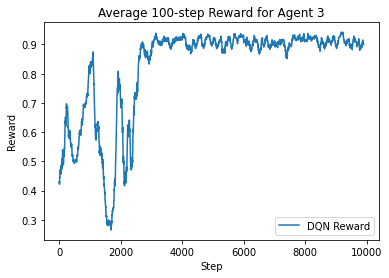

In [10]:
for i in range(n_agents):
    fig = plt.figure()
    plt.plot(avgs[i])
    plt.title("Average 100-step Reward for Agent " + str(i + 1))
    plt.xlabel("Step")
    plt.ylabel("Reward")
    plt.legend(["DQN Reward"])
    
    #plt.show()
    plt.savefig("DQN_reward" + str(i+1) + ".png")

### Actions

In [7]:
# Using np.unique is another way of doing this

agent_action_probs = [] # Time slice, agent_idx, action
possible_actions = sorted(list(set(actions.flatten())))
print(possible_actions)
steps = 100

for i in range(len(actions)//steps):
    action_slice = actions[i*steps: (i+1)*steps]
    agent_action_probs_this_time_slice = []
    for agent_index in range(n_agents):
        agent_actions = [0] * len(possible_actions)
        agent_action_slice = action_slice[:, agent_index]
        
        for i, action in enumerate(possible_actions):
            agent_actions[i] = np.count_nonzero(agent_action_slice == action)
             
        agent_action_probs_this_time_slice.append(np.array(agent_actions) / steps)
    
    agent_action_probs.append(agent_action_probs_this_time_slice)        

agent_action_probs = np.array(agent_action_probs)

[-1.0, 0.0, 1.0, 2.0]


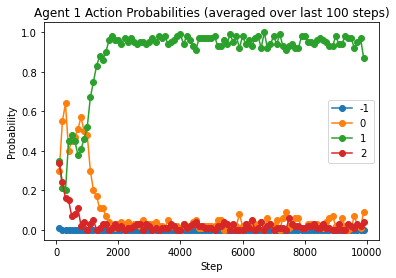

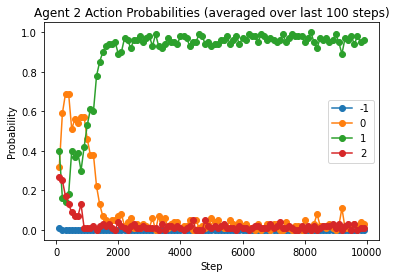

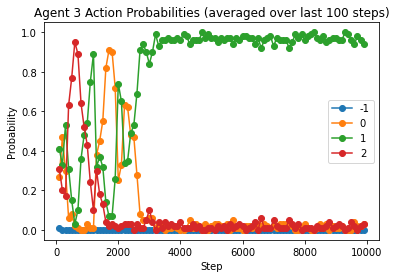

In [8]:
step_list = list(range(100, len(actions), 100))
labels = ['-1', '0', '1', '2']
#plt.plot(step_list, agent_action_probs[:, 0], label=['-1', '0', '1'])

for i in range(n_agents):
    fig = plt.figure()

    for j in range(len(possible_actions)):
        plt.plot(step_list, agent_action_probs[:, i, j], label=labels[j], marker='o')
    
    plt.legend(loc="right")
    plt.title("Agent " + str(i + 1) + " Action Probabilities (averaged over last 100 steps)")
    plt.xlabel("Step")
    plt.ylabel("Probability")
    plt.savefig("Agent " + str(i + 1) + " Action Probabilities.png")